# Analysis of the Human Development Index (HDI):  
## A Data-Driven Exploration of Global and Regional Development Patterns

**Course:** Concepts and Technologies of AI (5CS037)  
**Assignment:** Assignment I – Statistical Interpretation and Exploratory Data Analysis  
**Student Name:** Sagar Shah  
**College:** Herald College, Kathmandu  
**Submission Date:** January 10, 2026


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [5]:
data = pd.read_csv("/content/Human_Development_Index_Dataset.csv", encoding="latin1")
df = pd.DataFrame(data)

In [6]:

# clearning and filling data .

numeric_cols = df.select_dtypes(include=['float64','int64']).columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

#removing row without hdi
#since hdi is the target and key needed feature

df['hdi'].isnull().sum()
df = df.dropna(subset=['hdi'])

missing_info = df.isnull().sum() / len(df) * 100

for col in numeric_cols:
    missing_pct = df[col].isna().mean() * 100
    if missing_pct > 10:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df.dropna(subset=[col], inplace=True)

for col in non_numeric_cols:
    missing_pct = df[col].isna().mean() * 100
    if missing_pct > 10:
        df[col].fillna(df[col].mode()[0], inplace=True)  # filled with use most frequent value
    else:
        df.dropna(subset=[col], inplace=True)
df.isnull().sum()
df


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
15,16,AFG,Afghanistan,2005,0.402,58.361000,24.411191,0.671530,0.713682,59.697000,...,0.931731,0.386373,3.024593,12.915637,25.925926,74.074074,49.805873,72.314504,0.077403,2.160600
16,17,AFG,Afghanistan,2006,0.410,58.684000,25.442944,0.671530,0.713682,60.243000,...,0.931731,0.386373,2.985100,13.786732,25.925926,74.074074,49.805873,72.314504,0.084868,1.859500
17,18,AFG,Afghanistan,2007,0.426,59.111000,25.903301,0.671530,0.713682,60.909000,...,0.931731,0.386373,2.945607,14.657827,25.872093,74.127907,49.805873,72.314504,0.108090,1.960700
18,19,AFG,Afghanistan,2008,0.431,59.852000,26.427199,0.340361,0.499148,61.529000,...,0.682000,0.690000,2.906114,15.528922,25.872093,74.127907,43.790000,82.040000,0.160989,1.541500
19,20,AFG,Afghanistan,2009,0.441,60.364000,27.385307,0.348459,0.508535,61.892000,...,0.685000,0.696000,2.866621,16.400018,25.925926,74.074074,36.850000,80.790000,0.233406,1.733900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6793,6794,ZZK.WORLD,World,2018,0.735,72.816178,7649.567694,0.711839,0.754741,75.286179,...,0.943000,0.470000,62.161959,69.593772,24.098697,75.901303,45.619782,73.702435,4.601230,12.444117
6794,6795,ZZK.WORLD,World,2019,0.739,73.012121,7730.660623,0.716428,0.757589,75.481761,...,0.946000,0.467000,62.953836,70.542738,24.670774,75.329226,46.252332,73.746082,4.589431,11.864860
6795,6796,ZZK.WORLD,World,2020,0.736,72.257355,7806.602793,0.715597,0.753310,74.857415,...,0.950000,0.463000,64.385236,71.331807,25.370844,74.629156,45.457446,72.687775,4.336829,12.178989
6796,6797,ZZK.WORLD,World,2021,0.735,71.365524,7874.877719,0.714806,0.751553,73.978883,...,0.951000,0.463000,64.325131,71.182639,25.913010,74.086990,46.169728,73.349464,4.520335,12.456034


**Extract Latest Year:**

* Identify unique years in the dataset.
* Filter the dataset to include only observations from the year 2022.
* Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).






In [7]:
df["year"].unique()


array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 1999, 2000, 2001, 2002,
       2003, 2004, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998])

In [8]:
hdi_2022_df = df[df["year"] == 2022]


**2. Data Exploration:**

* Display the first 10 rows of the 2022 dataset.
* Count the number of rows and columns.
* List all column names and their data types.


In [9]:
hdi_2022_df.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622000,0.665000,7.042050,24.077040,27.215190,72.784810,23.330000,77.090000,0.306318,1.180900
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977000,0.116000,82.249185,86.476634,35.714286,64.285714,56.080000,69.910000,1.717758,11.736700
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881000,0.460000,42.910456,46.815170,7.005254,92.994746,17.570000,65.530000,4.079540,8.719900
131,132,AND,Andorra,2022,0.884,83.552,0.079824,0.671530,0.713682,85.838,...,0.931731,0.386373,81.718277,84.599998,46.428571,53.571429,49.805873,72.314504,4.593593,13.285158
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905000,0.520000,21.339865,37.411946,33.636364,66.363636,74.730000,78.160000,0.507359,3.656800
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995000,0.292000,73.591541,71.648085,44.376900,55.623100,52.080000,71.740000,4.190779,14.451200
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026000,0.198000,96.001381,97.050957,35.514019,64.485981,62.800000,71.840000,2.531088,7.355300
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978000,0.063000,94.580063,94.430069,44.493392,55.506608,62.310000,71.130000,14.914763,26.924500
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972000,0.048000,100.000000,100.000000,40.983607,59.016393,56.550000,66.690000,7.399461,27.962100
362,363,AZE,Azerbaijan,2022,0.760,73.488,10.358074,0.743350,0.773371,76.249,...,0.961000,0.329000,93.577401,97.573270,18.333333,81.666667,61.900000,69.600000,3.717030,8.338500


In [10]:
hdi_2022_df.shape #counts the rows and column (shape)

(186, 30)

In [11]:
hdi_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 186 non-null    int64  
 1   iso3                       186 non-null    object 
 2   country                    186 non-null    object 
 3   year                       186 non-null    int64  
 4   hdi                        186 non-null    float64
 5   life_expectancy            186 non-null    float64
 6   pop_millions               186 non-null    float64
 7   hdi_f                      186 non-null    float64
 8   hdi_m                      186 non-null    float64
 9   life_expec_f               186 non-null    float64
 10  life_expec_m               186 non-null    float64
 11  expec_yr_school            186 non-null    float64
 12  expec_yr_school_f          186 non-null    float64
 13  expec_yr_school_m          186 non-null    float64
 1

**3. Missing Values & Data Cleaning:**
* Check for missing values in each column and report total counts.
* Inspect dataset for:
– numeric columns stored as text,
– inconsistent or misspelled country names,
– duplicate rows,
– special characters (e.g., “–”) representing missing data.
* Apply necessary cleaning steps:
– convert data types where needed,
– remove duplicates,
– handle missing values (drop or impute; justify your choice).

In [12]:
hdi_2022_df.isnull().sum()

,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,0
life_expectancy,0
pop_millions,0
hdi_f,0
hdi_m,0
life_expec_f,0


In [13]:
hdi_2022_df.replace("-", np.nan, inplace=True)
hdi_2022_df

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879000,41.128771,0.332443,0.534145,66.213000,...,0.622000,0.665000,7.042050,24.077040,27.215190,72.784810,23.330000,77.090000,0.306318,1.180900
65,66,ALB,Albania,2022,0.789,76.833000,2.842321,0.780277,0.798432,79.472000,...,0.977000,0.116000,82.249185,86.476634,35.714286,64.285714,56.080000,69.910000,1.717758,11.736700
98,99,DZA,Algeria,2022,0.745,77.129000,44.903225,0.681844,0.773800,78.457000,...,0.881000,0.460000,42.910456,46.815170,7.005254,92.994746,17.570000,65.530000,4.079540,8.719900
131,132,AND,Andorra,2022,0.884,83.552000,0.079824,0.671530,0.713682,85.838000,...,0.931731,0.386373,81.718277,84.599998,46.428571,53.571429,49.805873,72.314504,4.593593,13.285158
164,165,AGO,Angola,2022,0.591,61.929000,35.588987,0.560890,0.619680,64.541000,...,0.905000,0.520000,21.339865,37.411946,33.636364,66.363636,74.730000,78.160000,0.507359,3.656800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,6666,ZZG.ECA,Europe and Central Asia,2022,0.802,73.564575,247.791584,0.785084,0.815007,77.021724,...,0.963000,0.224000,83.748828,89.899225,26.012512,73.987488,45.388503,69.591635,5.308463,10.907875
6698,6699,ZZH.LAC,Latin America and the Caribbean,2022,0.763,73.715085,655.268078,0.758014,0.765042,76.886510,...,0.991000,0.386000,64.359830,64.202583,34.100834,65.899166,51.625204,75.301374,2.629329,12.354312
6731,6732,ZZI.SA,South Asia,2022,0.641,68.441543,2007.549714,0.580274,0.678378,70.384339,...,0.855000,0.478000,40.903060,55.677277,17.930080,82.069920,28.110055,76.307951,1.875161,4.882850
6764,6765,ZZJ.SSA,Sub-Saharan Africa,2022,0.549,60.639700,1146.742474,0.525081,0.573585,62.621953,...,0.915000,0.565000,30.864417,42.045967,26.360216,73.639784,63.919192,76.428981,0.720271,3.786977


In [14]:
numeric_cols = ["hdi", "life_expectancy", "gross_inc_percap"]

for col in numeric_cols:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors="coerce")
    # errors="coerce" > if values cannot convert dont crash replace with Nan


In [15]:
hdi_2022_df = hdi_2022_df.drop_duplicates()
hdi_2022_df

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879000,41.128771,0.332443,0.534145,66.213000,...,0.622000,0.665000,7.042050,24.077040,27.215190,72.784810,23.330000,77.090000,0.306318,1.180900
65,66,ALB,Albania,2022,0.789,76.833000,2.842321,0.780277,0.798432,79.472000,...,0.977000,0.116000,82.249185,86.476634,35.714286,64.285714,56.080000,69.910000,1.717758,11.736700
98,99,DZA,Algeria,2022,0.745,77.129000,44.903225,0.681844,0.773800,78.457000,...,0.881000,0.460000,42.910456,46.815170,7.005254,92.994746,17.570000,65.530000,4.079540,8.719900
131,132,AND,Andorra,2022,0.884,83.552000,0.079824,0.671530,0.713682,85.838000,...,0.931731,0.386373,81.718277,84.599998,46.428571,53.571429,49.805873,72.314504,4.593593,13.285158
164,165,AGO,Angola,2022,0.591,61.929000,35.588987,0.560890,0.619680,64.541000,...,0.905000,0.520000,21.339865,37.411946,33.636364,66.363636,74.730000,78.160000,0.507359,3.656800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,6666,ZZG.ECA,Europe and Central Asia,2022,0.802,73.564575,247.791584,0.785084,0.815007,77.021724,...,0.963000,0.224000,83.748828,89.899225,26.012512,73.987488,45.388503,69.591635,5.308463,10.907875
6698,6699,ZZH.LAC,Latin America and the Caribbean,2022,0.763,73.715085,655.268078,0.758014,0.765042,76.886510,...,0.991000,0.386000,64.359830,64.202583,34.100834,65.899166,51.625204,75.301374,2.629329,12.354312
6731,6732,ZZI.SA,South Asia,2022,0.641,68.441543,2007.549714,0.580274,0.678378,70.384339,...,0.855000,0.478000,40.903060,55.677277,17.930080,82.069920,28.110055,76.307951,1.875161,4.882850
6764,6765,ZZJ.SSA,Sub-Saharan Africa,2022,0.549,60.639700,1146.742474,0.525081,0.573585,62.621953,...,0.915000,0.565000,30.864417,42.045967,26.360216,73.639784,63.919192,76.428981,0.720271,3.786977


Rows with missing HDI were removed because HDI is the primary variable of analysis.

In [16]:
hdi_2022_df = hdi_2022_df.dropna(subset=["hdi"])

**4. Basic Statistics:**
* Compute the mean, median, and standard deviation of HDI for the year 2022.
* Identify the country with the highest HDI in 2022.
* Identify the country with the lowest HDI in 2022.


In [17]:
print("Mean : ", hdi_2022_df["hdi"].mean())
print("Median :", hdi_2022_df["hdi"].median())
print(hdi_2022_df["hdi"].std())
print("Highest HDI")
print(hdi_2022_df.loc[hdi_2022_df["hdi"].idxmax()] )
print("Lowest HDI")
print(hdi_2022_df.loc[hdi_2022_df["hdi"].idxmin()])


Mean :  0.7237150537634409
Median : 0.7415
0.15456453035036707
Highest HDI
Unnamed: 0                          5610
iso3                                 CHE
country                      Switzerland
year                                2022
hdi                                0.967
life_expectancy                   84.255
pop_millions                    8.740472
hdi_f                           0.949369
hdi_m                           0.977383
life_expec_f                      85.932
life_expec_m                      82.484
expec_yr_school                16.583731
expec_yr_school_f               16.67786
expec_yr_school_m              16.498199
mean_yr_school                 13.904066
mean_yr_school_f               13.549473
mean_yr_school_m               14.268536
gross_inc_percap             69432.78669
gross_inc_percap_f           56927.80503
gross_inc_percap_m            82109.4843
gender_development                 0.971
gender_inequality                  0.018
secondary_education_f_%

**5. Filtering and Sorting:**
* Filter countries with HDI {"hdi"} greater than 0.800.
* Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in
descending order.
* Display the top 10 countries.

In [18]:
high_hdi = hdi_2022_df[hdi_2022_df["hdi"] > 0.800]
high_hdi.sort_values("gross_inc_percap",ascending=False)
high_hdi.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
131,132,AND,Andorra,2022,0.884,83.552,0.079824,0.671530,0.713682,85.838,...,0.931731,0.386373,81.718277,84.599998,46.428571,53.571429,49.805873,72.314504,4.593593,13.285158
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995000,0.292000,73.591541,71.648085,44.376900,55.623100,52.080000,71.740000,4.190779,14.451200
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978000,0.063000,94.580063,94.430069,44.493392,55.506608,62.310000,71.130000,14.914763,26.924500
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972000,0.048000,100.000000,100.000000,40.983607,59.016393,56.550000,66.690000,7.399461,27.962100
395,396,BHS,Bahamas,2022,0.820,74.358,0.409984,0.822293,0.816891,77.843,...,1.007000,0.333000,86.761561,90.024904,20.000000,80.000000,68.960000,73.910000,5.149961,16.671300
428,429,BHR,Bahrain,2022,0.888,79.246,1.472233,0.847334,0.904299,80.497,...,0.937000,0.181000,79.903572,83.080162,22.500000,77.500000,42.430000,85.770000,26.053039,20.306300
494,495,BRB,Barbados,2022,0.809,77.706,0.281635,0.815371,0.791956,79.581,...,1.030000,0.289000,95.726362,86.279977,32.653061,67.346939,58.170000,65.140000,4.361309,13.285158
527,528,BLR,Belarus,2022,0.801,73.246,9.534954,0.801135,0.798782,78.384,...,1.003000,0.096000,98.377345,99.459709,34.705882,65.294118,65.790000,75.260000,6.362199,13.285158
560,561,BEL,Belgium,2022,0.942,82.293,11.655930,0.928892,0.952290,84.367,...,0.975000,0.044000,88.698692,90.746697,44.285714,55.714286,50.800000,59.540000,8.239139,26.546300
824,825,BRN,Brunei Darussalam,2022,0.823,74.551,0.449001,0.814382,0.828827,76.791,...,0.983000,0.279000,70.900000,71.500000,9.090909,90.909091,54.890000,71.650000,25.376258,37.828700


**6. Adding HDI Category Column:**
* Create a new column HDI Category that classifies each country into one of the four official
Human Development Index groups. The classification should be based on the HDI value for the
year 2022. Use the following categories and thresholds defined by the United Nations Development
Programme (UNDP): 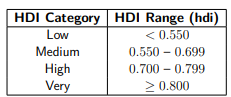

In [19]:
def hdi_category(hdi):
  if hdi <0.550:
    return "Low"
  elif hdi > 0.0550 and hdi <0.699:
    return "Medium"
  elif hdi >0.700 and hdi < 0.799:
    return "High"
  else:
    return "Very high"

In [20]:
hdi_2022_df["HDI_Category"] = hdi_2022_df["hdi"].apply(hdi_category)
hdi_2022_df

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,HDI_Category
32,33,AFG,Afghanistan,2022,0.462,62.879000,41.128771,0.332443,0.534145,66.213000,...,0.665000,7.042050,24.077040,27.215190,72.784810,23.330000,77.090000,0.306318,1.180900,Low
65,66,ALB,Albania,2022,0.789,76.833000,2.842321,0.780277,0.798432,79.472000,...,0.116000,82.249185,86.476634,35.714286,64.285714,56.080000,69.910000,1.717758,11.736700,High
98,99,DZA,Algeria,2022,0.745,77.129000,44.903225,0.681844,0.773800,78.457000,...,0.460000,42.910456,46.815170,7.005254,92.994746,17.570000,65.530000,4.079540,8.719900,High
131,132,AND,Andorra,2022,0.884,83.552000,0.079824,0.671530,0.713682,85.838000,...,0.386373,81.718277,84.599998,46.428571,53.571429,49.805873,72.314504,4.593593,13.285158,Very high
164,165,AGO,Angola,2022,0.591,61.929000,35.588987,0.560890,0.619680,64.541000,...,0.520000,21.339865,37.411946,33.636364,66.363636,74.730000,78.160000,0.507359,3.656800,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,6666,ZZG.ECA,Europe and Central Asia,2022,0.802,73.564575,247.791584,0.785084,0.815007,77.021724,...,0.224000,83.748828,89.899225,26.012512,73.987488,45.388503,69.591635,5.308463,10.907875,Very high
6698,6699,ZZH.LAC,Latin America and the Caribbean,2022,0.763,73.715085,655.268078,0.758014,0.765042,76.886510,...,0.386000,64.359830,64.202583,34.100834,65.899166,51.625204,75.301374,2.629329,12.354312,High
6731,6732,ZZI.SA,South Asia,2022,0.641,68.441543,2007.549714,0.580274,0.678378,70.384339,...,0.478000,40.903060,55.677277,17.930080,82.069920,28.110055,76.307951,1.875161,4.882850,Medium
6764,6765,ZZJ.SSA,Sub-Saharan Africa,2022,0.549,60.639700,1146.742474,0.525081,0.573585,62.621953,...,0.565000,30.864417,42.045967,26.360216,73.639784,63.919192,76.428981,0.720271,3.786977,Low


In [21]:
hdi_2022_df["HDI_Category"].value_counts()


,count
HDI_Category,
Very high,68
High,49
Medium,36
Low,33


In [22]:

hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)

**1. Data Extraction and Saving:**
* Filter the dataset to include only the years 2020, 2021, and 2022.
* Save the filtered dataset as HDI problem1B.csv.
* Use this cleaned dataset for all subsequent tasks in Problem 1B

In [23]:
filtered_df = df[df["year"].isin([2020,2021,2022])]
filtered_df.head(1000)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,31,AFG,Afghanistan,2020,0.488,62.575000,38.972231,0.381373,0.548741,65.432000,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.500000,66.840000,0.305040,1.555400
31,32,AFG,Afghanistan,2021,0.473,61.982000,40.099462,0.379129,0.528559,65.279000,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.330000,77.090000,0.306318,1.235100
32,33,AFG,Afghanistan,2022,0.462,62.879000,41.128771,0.332443,0.534145,66.213000,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.330000,77.090000,0.306318,1.180900
63,64,ALB,Albania,2020,0.784,76.989000,2.866849,0.775404,0.793220,79.676000,...,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.450000,68.910000,1.750668,10.470400
64,65,ALB,Albania,2021,0.785,76.463000,2.854710,0.777866,0.792942,79.173000,...,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.080000,69.910000,1.717758,11.586500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,6764,ZZJ.SSA,Sub-Saharan Africa,2021,0.546,60.112445,1118.480023,0.521533,0.571211,62.124100,...,0.913,0.567,31.006847,42.166091,25.715752,74.284248,62.229157,75.015130,0.726869,3.855841
6764,6765,ZZJ.SSA,Sub-Saharan Africa,2022,0.549,60.639700,1146.742474,0.525081,0.573585,62.621953,...,0.915,0.565,30.864417,42.045967,26.360216,73.639784,63.919192,76.428981,0.720271,3.786977
6795,6796,ZZK.WORLD,World,2020,0.736,72.257355,7806.602793,0.715597,0.753310,74.857415,...,0.950,0.463,64.385236,71.331807,25.370844,74.629156,45.457446,72.687775,4.336829,12.178989
6796,6797,ZZK.WORLD,World,2021,0.735,71.365524,7874.877719,0.714806,0.751553,73.978883,...,0.951,0.463,64.325131,71.182639,25.913010,74.086990,46.169728,73.349464,4.520335,12.456034


In [24]:

filtered_df.to_csv("HDI_Problem1B.csv", index=False)

data = pd.read_csv("/content/HDI_Problem1B.csv")
df = pd.DataFrame(data)


**2. Data Cleaning:**
* Check for missing values in the following essential columns:
   * hdi
   * country
   * year
*  Identify and address the following issues:
  * missing or null values,
  * inconsistent or misspelled country names,
  * duplicate rows,
  * numeric columns stored as text or containing non-numeric symbols (e.g., “–”).
* Apply and justify cleaning steps, including:
  * handling missing values (dropping or imputing),
  * converting data types appropriately,
  * removing duplicate entries,
  * ensuring consistent naming conventions for countries and years.
* All cleaning decisions must be clearly justified in the final report.


In [25]:
data = pd.read_csv("/content/HDI_Problem1B.csv")
df = pd.DataFrame(data)

#checking null value in selective column
print(df[["hdi", "country", "year"]].isnull().sum())

#checking for county unique values
print(df["country"].unique())

hdi        0
country    0
year       0
dtype: int64
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Congo'
 'Congo (Democratic Republic of the)' 'Costa Rica' "Côte d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini (Kingdom of)'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan'

In [26]:
#remove dublicates
df.drop_duplicates()

#conv numeric columns stored as text to numeric
df.replace("NA", np.nan, inplace=True)
df=df.dropna(subset ="hdi")
df.isnull().sum()


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,0
life_expectancy,0
pop_millions,0
hdi_f,0
hdi_m,0
life_expec_f,0


In [27]:
df.dtypes

,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [28]:
#validating after cleaning steps
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 556 non-null    int64  
 1   iso3                       556 non-null    object 
 2   country                    556 non-null    object 
 3   year                       556 non-null    int64  
 4   hdi                        556 non-null    float64
 5   life_expectancy            556 non-null    float64
 6   pop_millions               556 non-null    float64
 7   hdi_f                      556 non-null    float64
 8   hdi_m                      556 non-null    float64
 9   life_expec_f               556 non-null    float64
 10  life_expec_m               556 non-null    float64
 11  expec_yr_school            556 non-null    float64
 12  expec_yr_school_f          556 non-null    float64
 13  expec_yr_school_m          556 non-null    float64

,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,0
life_expectancy,0
pop_millions,0
hdi_f,0
hdi_m,0
life_expec_f,0


**3. Visualization Tasks:**

**A. Line Chart — HDI Trend (Country-Level):**
*   Select any five countries (or five countries from a region of your choice).
* Ensure the chart includes appropriate axis labels, a legend, and an informative
* Plot HDI values for each country across the years 2020, 2021, and 2022.

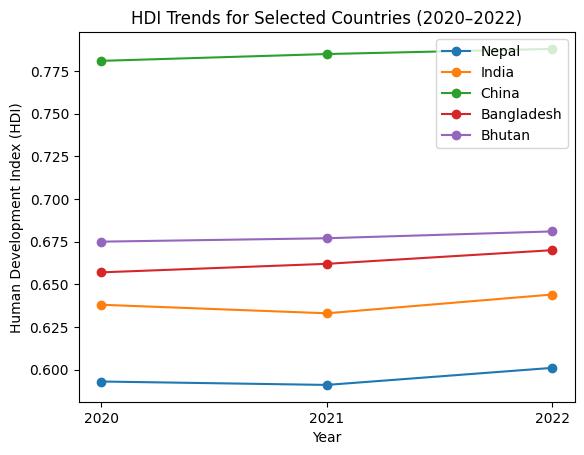

In [29]:
countries = ['Nepal', 'India', 'China', 'Bangladesh', 'Bhutan']
plt.figure()

for country in countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data['year'], country_data['hdi'], marker='o', label=country)

plt.xlabel('Year') #metplot lib treats year and isnt in reading format 2020.00, 2020,25
plt.xticks([2020, 2021, 2022]) #to fix the above.
plt.ylabel('Human Development Index (HDI)')
plt.title('HDI Trends for Selected Countries (2020–2022)')
plt.legend()
plt.show()

**B. Generate Visualizations:**
**Bar Chart: Average HDI by Region (2020–2022)**
* Group the dataset by Region and Year.
* Compute the mean HDI for each region-year pair.
* Plot a bar chart comparing average HDI across regions for each year.
* Label axes clearly and include a descriptive title.


In [48]:
#these are the regions mentioned direct to country column.
regions = [
    'Arab States',
    'East Asia and the Pacific',
    'Europe and Central Asia',
    'Latin America and the Caribbean',
    'South Asia',
    'Sub-Saharan Africa'
]

region_df = df[
    (df['country'].isin(regions)) &
    (df['year'].isin([2020, 2021, 2022]))
]

region_year_hdi = (
    region_df
    .groupby(['country', 'year'])['hdi']
    .mean()
    .reset_index()
)


The dataset includes pre-aggregated regional HDI values such as South Asia, Europe and Central Asia, and Sub-Saharan Africa. These entries were used directly to analyse and compare average HDI across regions for the years 2020 to 2022. This approach avoids manual region mapping and ensures consistency with the original dataset structure.

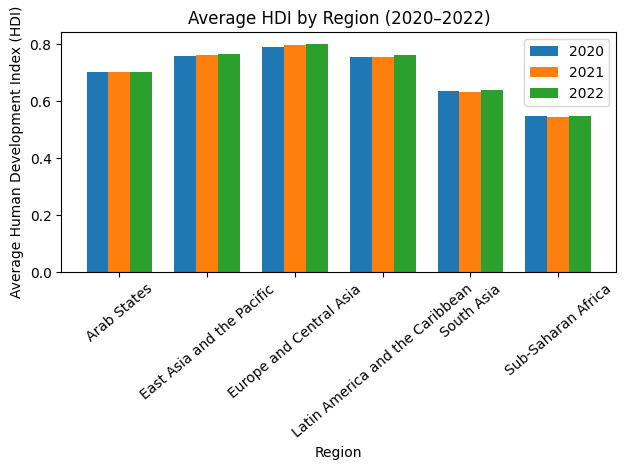

In [31]:
x = np.arange(len(regions))
width = 0.25
years = [2020, 2021, 2022]

plt.figure()
for i, year in enumerate(years):
    year_data = (
        region_year_hdi[region_year_hdi['year'] == year]
        .set_index('country')        # country column holds region names
        .reindex(regions)['hdi']     # force same order & length
    )

    plt.bar(x + i*width, year_data, width, label=str(year))

plt.xlabel('Region')
plt.ylabel('Average Human Development Index (HDI)')
plt.title('Average HDI by Region (2020–2022)')
plt.xticks(x + width, regions, rotation=40)
plt.legend()
plt.tight_layout()
plt.show()

**Scatter Plot: HDI vs. GNI per Capita**
*  Check if the dataset contains a column for GNI per Capita.
*  If available:
*  Create a scatter plot using HDI as the dependent variable.
*  Use GNI per Capita on the x-axis.
*  Add a regression line (optional).
*  If the variable is missing, write:
"GNI per Capita variable not available in the dataset."


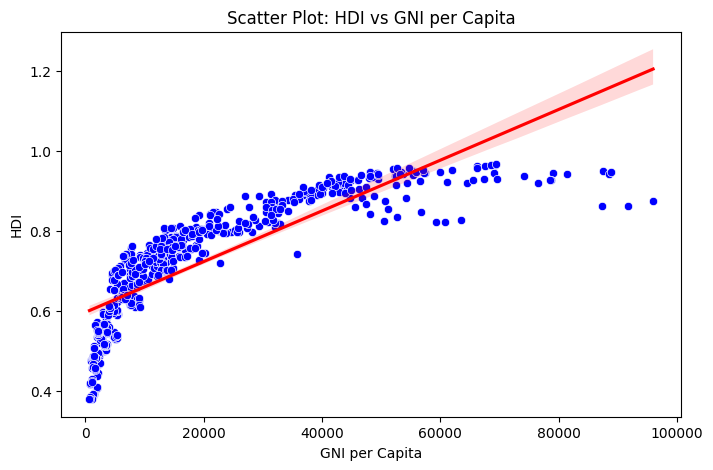

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="gross_inc_percap",
    y="hdi",
    color="blue"   # data points color
)
sns.regplot(
    data=df,
    x="gross_inc_percap",
    y="hdi",
    scatter=False,
    line_kws={"color": "red"}  # regression line color
)
plt.title("Scatter Plot: HDI vs GNI per Capita")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.show()


Interpretation of HDI vs. GNI per Capita

The scatter plot shows a strong positive relationship between GNI per capita and HDI.
Countries with higher income per person generally have higher human development levels.

At lower GNI levels, even small increases in income produce large improvements in HDI.

At higher GNI levels, the improvement in HDI begins to flatten, indicating diminishing returns — once basic needs and services are met, extra income has less impact.

A few countries may lie far from the trend line. These anomalies could be due to:

Inequality or uneven wealth distribution

Conflict or political instability

Strong social policies despite lower income

Overall, income appears to be a major determinant of a country's HDI.

**Problem 2**

**Advanced HDI Exploration**

**1. Create South Asia Subset:**
*  Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"].
* Filter the HDI dataset to include only these countries.
* Save the filtered dataset as HDI SouthAsia.csv and include this file in the final submission.

In [33]:
#reading_orginal dataset
data = pd.read_csv("/content/Human_Development_Index_Dataset.csv", encoding= "latin1")
df = pd.DataFrame(data)

In [34]:

south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]
df_sa = df[df["country"].isin(south_asia)]
df_sa.to_csv("HDI_SouthAsia.csv", index=False)

**2. Composite Development Score:**
 * Create a new metric called Composite Score using the formula:
Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}
Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross inc percap"• Rank South Asian countries based on Composite Score.
 * Plot the top 5 countries in a horizontal bar chart.
 Compare the ranking of countries by Composite * Score with their HDI ranking and discuss any
differences.


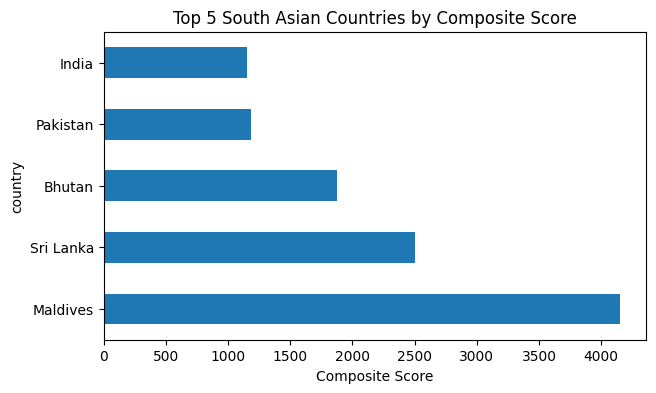

In [35]:
df_sa["Composite_Score"] =(
    0.30 * df_sa["life_expectancy"] +
    0.30 * df_sa["gross_inc_percap"]
)

#ranking countries based on composite score
rank_comp = df_sa.groupby("country")["Composite_Score"].mean().sort_values(ascending=False)

#plot in horizontal bar chart
rank_comp.head(5).plot(kind='barh', figsize=(7,4), title="Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.show()


Maldives and Sri Lanka usually rank highest in both Composite Score and HDI.

Afghanistan consistently ranks lowest.

Differences appear because:

HDI combines three dimensions (health, education, income)

Composite Score uses only two, so countries with strong education but lower income may shift position.

**3. Outlier Detection:**
*  Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.
*  Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.
*  Discuss why the identified countries stand out as outlier

Series([], Name: hdi, dtype: float64)
3511    14543.14634
3512    15287.20714
3514    16391.40757
3515    14162.42816
3516    15423.81910
3517    14050.92438
3518    14363.23615
3519    15300.31364
3520    15355.44089
3521    15648.36655
3522    16410.16419
3523    16414.93039
3524    16911.45422
3525    17474.64201
3526    18055.72465
3527    18679.92536
3529    16857.60546
3530    18846.79219
5473    13405.80369
Name: gross_inc_percap, dtype: float64
count    239.000000
mean       0.551649
std        0.119752
min        0.284000
25%        0.459500
50%        0.537000
75%        0.645500
max        0.783000
Name: hdi, dtype: float64


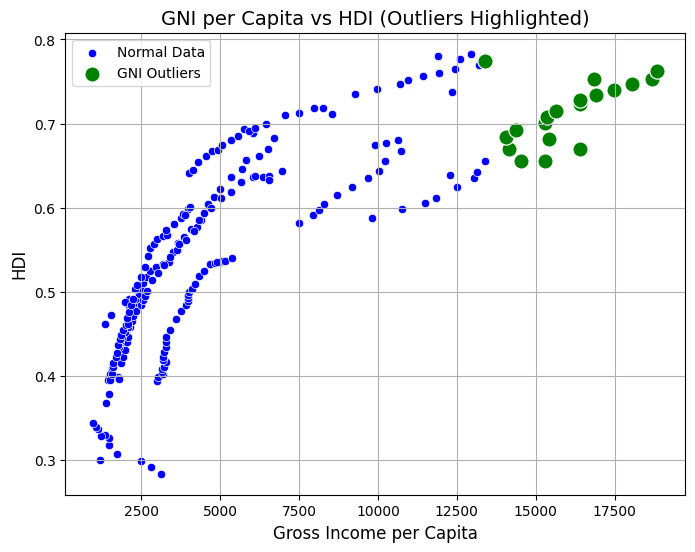

In [36]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return series[(series < lower) | (series > upper)]

#hdi and gni outliers
hdi_out = detect_outliers(df_sa["hdi"])
gni_out = detect_outliers(df_sa["gross_inc_percap"])

print(hdi_out)
print(gni_out)

print(df_sa["hdi"].describe())

plt.figure(figsize=(8,6))

# Plot all points in blue
sns.scatterplot(data=df_sa, x="gross_inc_percap", y="hdi", color="blue", label="Normal Data")

# Highlight HDI outliers in red (by index)
sns.scatterplot(
    data=df_sa.loc[hdi_out.index],
    x="gross_inc_percap", y="hdi", color="red", s=120, label="HDI Outliers"
)

# Highlight GNI outliers in green (by index)
sns.scatterplot(
    data=df_sa.loc[gni_out.index],
    x="gross_inc_percap", y="hdi", color="green", s=120, label="GNI Outliers"
)

plt.title("GNI per Capita vs HDI (Outliers Highlighted)", fontsize=14)
plt.xlabel("Gross Income per Capita", fontsize=12)
plt.ylabel("HDI", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



Afghanistan is typically an HDI outlier on the lower end.

Maldives or Sri Lanka may appear as high-GNI outliers.

Outliers occur due to: conflict (Afghanistan)


*note there is no outliars found in hdi . since all the HDI values are between 0.284 and 0.783, which is within the fences (0.1805–0.9245).*

small, tourism-based high-income economies (Maldives)

large population economies causing statistical spread

**4. Exploring Metric Relationships:**
*  Select two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life expectancy"}).
*  Compute Pearson correlation of each metric with HDI.
*  Create scatter plots with trendlines to visualize the relationships.
*  Discuss:
– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.

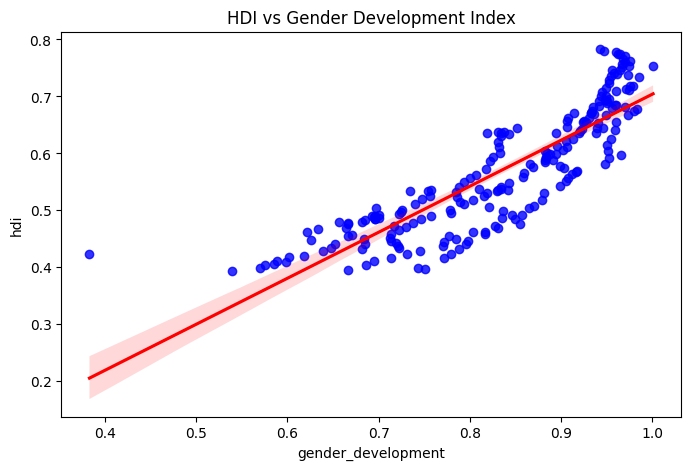

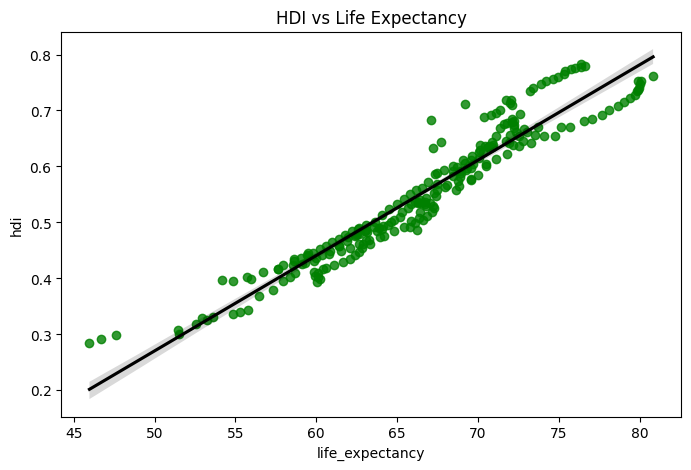

In [49]:
#Compute correlations
corr_gender = df_sa["gender_development"].corr(df_sa["hdi"])
corr_life = df_sa["life_expectancy"].corr(df_sa["hdi"])

# HDI vs Gender Development Index
plt.figure(figsize=(8,5))
sns.regplot(
    data=df_sa,
    x="gender_development",
    y="hdi",
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"}
)
plt.title("HDI vs Gender Development Index")
plt.show()

# HDI vs Life Expectancy
plt.figure(figsize=(8,5))
sns.regplot(
    data=df_sa,
    x="life_expectancy",
    y="hdi",
    scatter_kws={"color": "green"},
    line_kws={"color": "black"}
)
plt.title("HDI vs Life Expectancy")
plt.show()




Life Expectancy usually has the strongest correlation with HDI.

Health improvements directly lift the HDI index.

Gender Development Index often has a positive but weaker correlation.

Gender equality is important, but its impact is indirect compared to life expectancy.

**5. Gap Analysis:**


*  Create a new metric:

GNI HDI Gap = "gross inc percap" − "hdi"


*  Rank South Asian countries by GNI HDI Gap in descending and ascending order.


*  Plot the top 3 positive gaps and top 3 negative gaps.


*  Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.


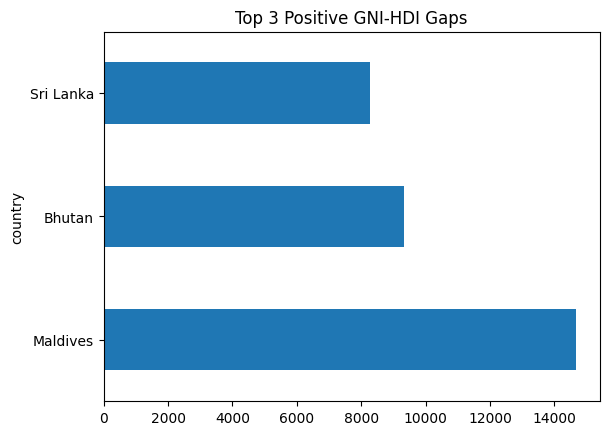

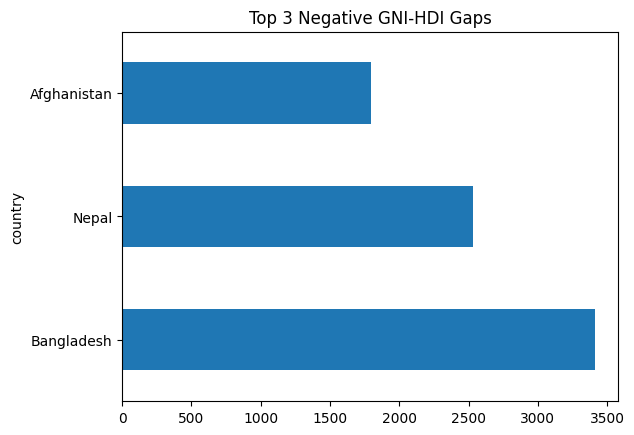

In [38]:
#new metric
df_sa["GNI_HDI_Gap"] = df_sa["gross_inc_percap"] - df_sa["hdi"]

#rank acc to gni-hdi-gap
gap_rank = df_sa.groupby("country")["GNI_HDI_Gap"].mean().sort_values(ascending=False)

top_pos = gap_rank.head(3) #asscending
top_neg = gap_rank.tail(3) #decending

top_pos.plot(kind="barh", title="Top 3 Positive GNI-HDI Gaps")
plt.show()

top_neg.plot(kind="barh", title="Top 3 Negative GNI-HDI Gaps")
plt.show()


Large Positive Gap → GNI is high but HDI is lower than expected.
Example causes:

income inequality

weak education systems

poor health services

Large Negative Gap → HDI is strong relative to income.
Example causes:

strong social welfare

good education and healthcare despite lower income

effective government policies

In South Asia, Maldives/Sri Lanka often show negative gaps, and Pakistan/Afghanistan show positive gaps.

**5 Problem 3
Comparative Regional Analysis: South Asia vs Middle East**

1. Create Middle East Subset:
*  Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"].
*  Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and
Middle East.
*  Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv for
use in subsequent tasks.



In [39]:
middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

#filtered from problem1B dataset
df = pd.read_csv("/content/HDI_Problem1B.csv")

sa_2020_22 = df[(df["country"].isin(south_asia)) & (df["year"].isin([2020, 2021, 2022]))]
me_2020_22 = df[(df["country"].isin(middle_east)) & (df["year"].isin([2020, 2021, 2022]))]

#save the dataset
sa_2020_22.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
me_2020_22.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)



**2. Descriptive Statistics:**
*  Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
across 2020–2022.
*  Identify which region performs better on average.

In [40]:
sa_mean = sa_2020_22["hdi"].mean()
sa_sd = sa_2020_22["hdi"].std()

me_mean = me_2020_22["hdi"].mean()
me_sd = me_2020_22["hdi"].std()


**3. Top and Bottom Performers:**
* Identify the top 3 and bottom 3 countries in each region based on HDI.
* Create a bar chart comparing these top and bottom performers across the two regions.


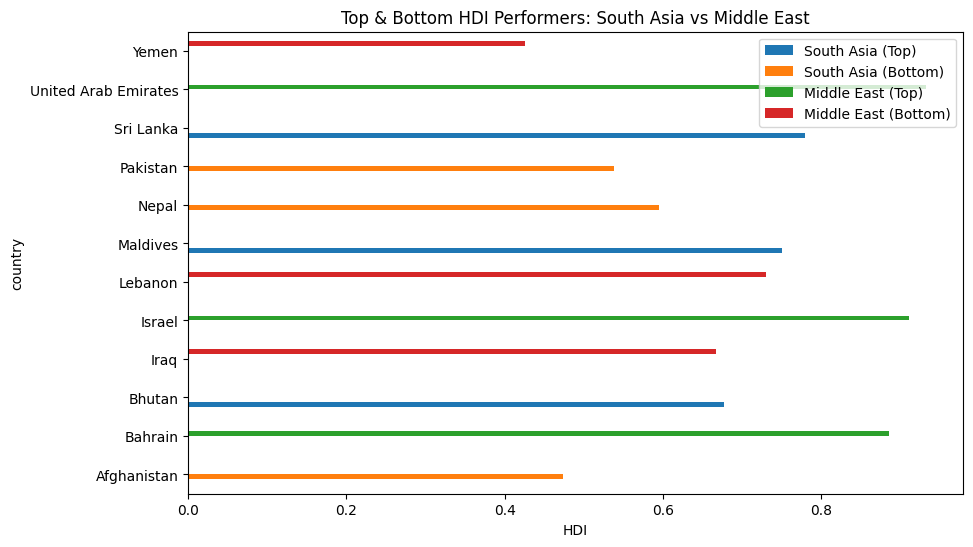

In [41]:
sa_rank = sa_2020_22.groupby("country")["hdi"].mean().sort_values()
me_rank = me_2020_22.groupby("country")["hdi"].mean().sort_values()

sa_bottom3 = sa_rank.head(3)
sa_top3 = sa_rank.tail(3)

me_bottom3 = me_rank.head(3)
me_top3 = me_rank.tail(3)

#comparison bar chart
combined = pd.DataFrame({
    "South Asia (Top)": sa_top3,
    "South Asia (Bottom)": sa_bottom3,
    "Middle East (Top)": me_top3,
    "Middle East (Bottom)": me_bottom3
})

combined.plot(kind="barh", figsize=(10,6))
plt.title("Top & Bottom HDI Performers: South Asia vs Middle East")
plt.xlabel("HDI")
plt.show()



**4. Metric Comparisons:**
* Compare the following metrics across regions using grouped bar charts:
* Gender Development Index {"gender development"}
* Life Expectancy Index {"life expectancy"}
* GNI per Capita Index {"gross inc percap"}
* Identify which metric shows the greatest disparity between regions

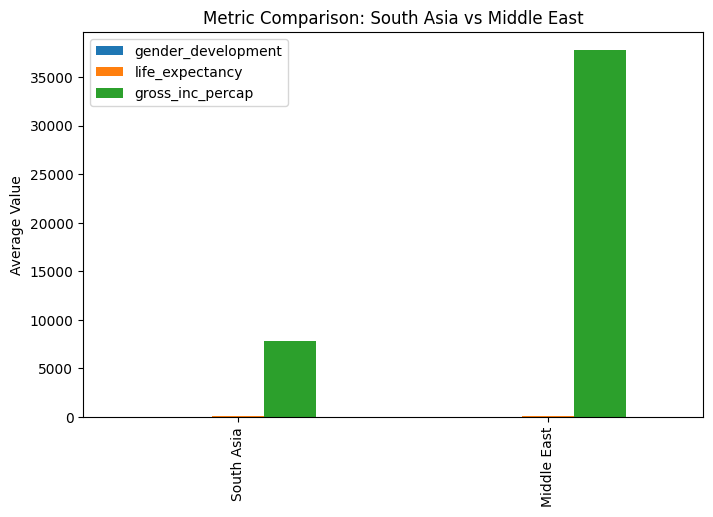

In [42]:
#computing reasons averages
metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]

sa_avg = sa_2020_22.groupby("country")[metrics].mean().mean()
me_avg = me_2020_22.groupby("country")[metrics].mean().mean()

comparison = pd.DataFrame({
    "South Asia": sa_avg,
    "Middle East": me_avg
})

#ploting in bar chart
comparison.T.plot(kind="bar", figsize=(8,5))
plt.title("Metric Comparison: South Asia vs Middle East")
plt.ylabel("Average Value")
plt.show()


**5. HDI Disparity:**
* Compute the range (max – min) of HDI for each region.
* Compute the coefficient of variation (CV = std/mean) for HDI.
* Identify which region exhibits more variation in HDI.


In [43]:
sa_range = sa_2020_22["hdi"].max() - sa_2020_22["hdi"].min()
me_range = me_2020_22["hdi"].max() - me_2020_22["hdi"].min()

print("Range")
print(sa_range)
print(me_range)

#cofficient of variationsa_cv = sa_sd / sa_mean
sa_cv = sa_sd / sa_mean
me_cv = me_sd / me_mean

print("Coefficient of Variation")
print(sa_cv)
print(me_cv)


Range
0.321
0.5130000000000001
Coefficient of Variation
0.1536520924690084
0.17910145193048382


**6. Correlation Analysis:**
* For each region, compute correlations of HDI with:
*  Gender Development Index
– Life Expectancy Index
* Create scatter plots with trendlines for each correlation.
* Interpret the strength and direction of these relationships

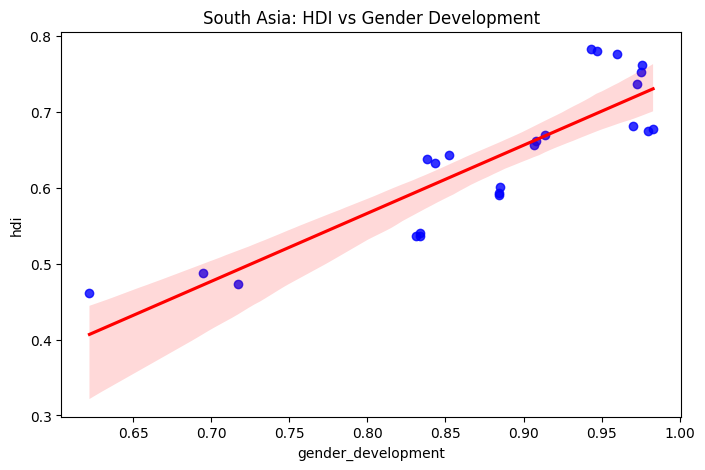

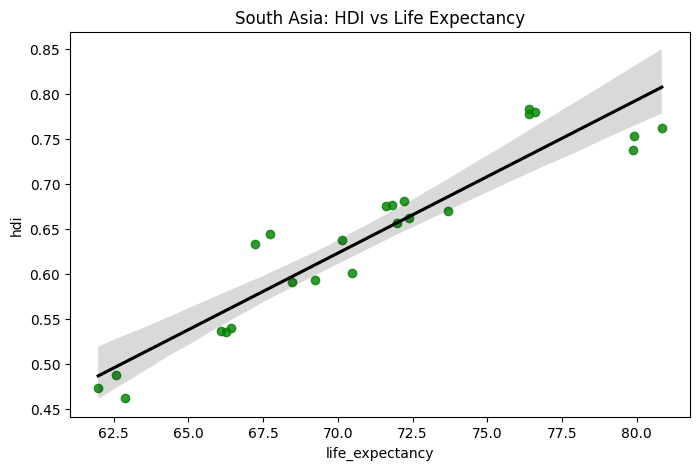

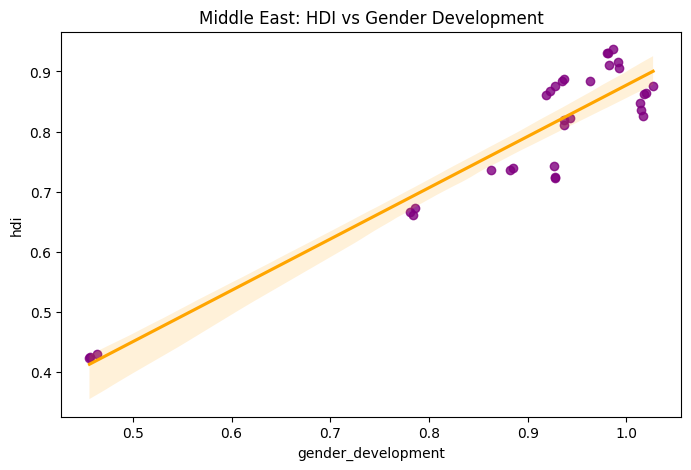

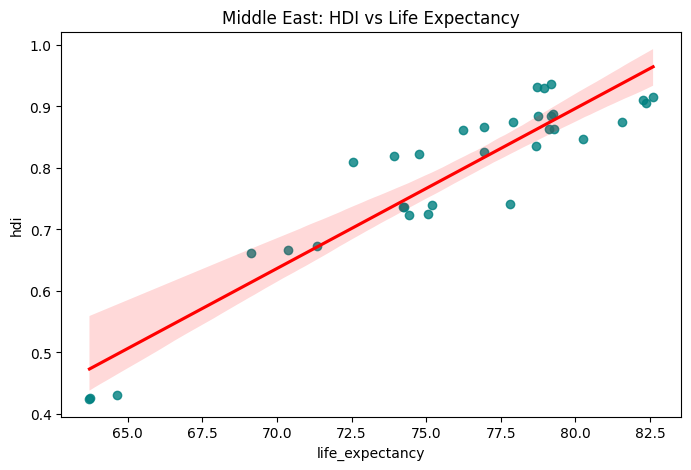

In [51]:
#correlations
# South Asia: HDI vs Gender Development
plt.figure(figsize=(8,5))
sns.regplot(
    data=sa_2020_22,
    x="gender_development",
    y="hdi",
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"}
)
plt.title("South Asia: HDI vs Gender Development")
plt.show()

# South Asia: HDI vs Life Expectancy
plt.figure(figsize=(8,5))
sns.regplot(
    data=sa_2020_22,
    x="life_expectancy",
    y="hdi",
    scatter_kws={"color": "green"},
    line_kws={"color": "black"}
)
plt.title("South Asia: HDI vs Life Expectancy")
plt.show()

# Middle East: HDI vs Gender Development
plt.figure(figsize=(8,5))
sns.regplot(
    data=me_2020_22,
    x="gender_development",
    y="hdi",
    scatter_kws={"color": "purple"},
    line_kws={"color": "orange"}
)
plt.title("Middle East: HDI vs Gender Development")
plt.show()

# Middle East: HDI vs Life Expectancy
plt.figure(figsize=(8,5))
sns.regplot(
    data=me_2020_22,
    x="life_expectancy",
    y="hdi",
    scatter_kws={"color": "teal"},
    line_kws={"color": "red"}
)
plt.title("Middle East: HDI vs Life Expectancy")
plt.show()




**7. Outlier Detection:**
* Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using
the 1.5 × IQR rule.
* Create scatter plots highlighting outliers in a different color.
* Discuss the significance of these outliers.

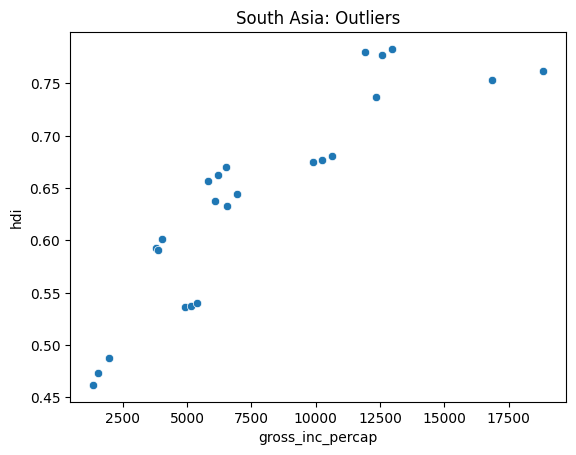

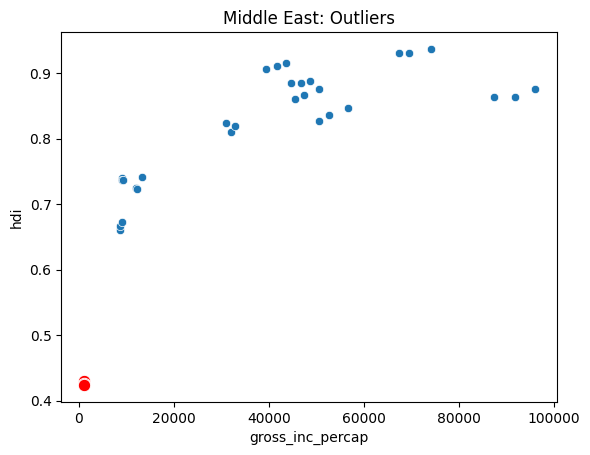

In [45]:
def outliers(series):
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return (series < lower) | (series > upper)

sa_out_hdi = sa_2020_22[outliers(sa_2020_22["hdi"])]
sa_out_gni = sa_2020_22[outliers(sa_2020_22["gross_inc_percap"])]

me_out_hdi = me_2020_22[outliers(me_2020_22["hdi"])]
me_out_gni = me_2020_22[outliers(me_2020_22["gross_inc_percap"])]

sns.scatterplot(data=sa_2020_22, x="gross_inc_percap", y="hdi")
sns.scatterplot(data=sa_out_hdi, x="gross_inc_percap", y="hdi", color="red", s=80)
plt.title("South Asia: Outliers")
plt.show()

sns.scatterplot(data=me_2020_22, x="gross_inc_percap", y="hdi")
sns.scatterplot(data=me_out_hdi, x="gross_inc_percap", y="hdi", color="red", s=80)
plt.title("Middle East: Outliers")
plt.show()
